In [1]:
from L420A import everything

In [2]:
everything.setup()

Biosphere database already present!!! No setup is needed
Database has already been imported
premise v.(1, 7, 6)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                         

In [5]:
everything.bd.projects.set_current('MCCFF')

In [6]:
everything.bd.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent-3.9.1-cuttoff

In [ ]:
everything.constructor_main(file = 'Case_study_existing_building_wEOL_4.xlsx', sheet = 'Construction')

In [ ]:
everything.renovation_main(file = 'Case_study_existing_building_wEOL_4.xlsx', sheet = 'Renovation')

In [ ]:
mfa = everything.Mfa(2020, 2050)

In [6]:
for product in everything.Product.real_instances:
    mfa.add_renovation_points(product)

In [7]:
for product in everything.Product.real_instances:
    mfa.add_eol_points(product)

In [36]:
everything.bd.databases

Databases dictionary with 10 object(s):
	SSP2-RCP19_2020
	SSP2-RCP19_2030
	SSP2-RCP19_2040
	SSP2-RCP19_2050
	SSP2-RCP26_2020
	SSP2-RCP26_2030
	SSP2-RCP26_2040
	SSP2-RCP26_2050
	biosphere3
	ecoinvent-3.9.1-cuttoff

In [8]:
mfa.points

[(2046, ventilation duct production, steel, 100x50 mm),
 (2046, hot water tank production, 600l),
 (2046, heat pump production),
 (2046, evacuated tube collector production),
 (2046, polyethylene production, high density, granulate),
 (2046, steel production, converter, low-alloyed),
 (2050, gypsum plasterboard production),
 (2050,
  concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates),
 (2050, polyethylene production, low density, granulate),
 (2050, polyethylene production, low density, granulate),
 (2050, steel production, converter, low-alloyed),
 (2050, hot water tank production, 600l),
 (2050, heat pump production),
 (2050, fibre cement roof slate production),
 (2050, ventilation duct production, steel, 100x50 mm),
 (2050, evacuated tube collector production),
 (2050, market for concrete slab),
 (2050,
  concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregate

In [9]:
clean_list_renovation= mfa.clean_list_renovation()

In [10]:
clean_list_eol = mfa.clean_list_eol()

In [11]:
# extend the renovation list with the eol list
clean_list = clean_list_renovation + clean_list_eol

In [12]:
lca = everything.ProLCA(activities_and_years=clean_list, yearly_databases=mfa.create_time_line_dict(), 
                         methods=[('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)'), ('EF v3.0 EN15804', 'acidification', 'accumulated exceedance (AE)')],
                         products=everything.Product.real_instances)

In [13]:
operational = lca.give_me_operational()

26
4
48830.63318870468
48830.63318870468
5
61091.09363970354
61091.09363970354
3
36126.448196349666
36126.448196349666
22
261056.48967538835
261056.48967538835


In [14]:
# production_lci = lca.production_lca()

In [15]:
# other_lci = lca.give_me_embodied()

In [16]:
# # pickle other lci
# import pickle
# with open('other_lci.pickle', 'wb') as handle:
#     pickle.dump(other_lci, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # # pickle production lci
# # import pickle
# with open('production_lci.pickle', 'wb') as handle:
#     pickle.dump(production_lci, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
# unpickle production lci and other lci
import pickle
with open('production_lci.pickle', 'rb') as handle:
    production_lci = pickle.load(handle)
    
with open('other_lci.pickle', 'rb') as handle:
    other_lci = pickle.load(handle)

In [16]:
def aggregation_renovation_eol():
    lci_renovation_eol = other_lci.copy()
    clean_list_copy = clean_list.copy()
    aggregated_results = {}
    # loop over the lci renovation eol dictionary and clean list
    # check if the activity matches the clean list is in the lci dictionary
    # multiply the lci dictionary with the clean list and add the results to a list
    for key, value in lci_renovation_eol.items():
        for i in clean_list_copy:
            
            if key[1] == i[1]:
                if len(value) > 1:
                    # multiply each value in the list by the amount
                    result = [x*i[2].amount for x in value]
                    aggregated_results[(i[0], i[2], key[2])] = result
    return aggregated_results
aggreat = aggregation_renovation_eol()

In [17]:
# append aggregated results to the production lci to a new dictionary
full_results = {}
for key, value in production_lci.items():
    full_results[key] = value
for key, value in aggreat.items():
    full_results[key] = value
for key, value in operational.items():
    full_results[key] = value
full_results


{(2020,
  concrete_foundation_production,
  'ecoinvent-3.9.1-cuttoff'): [13872.880638500286, 43.99707920471239],
 (2020,
  polystyrene foam slab production, 45% recycled,
  'ecoinvent-3.9.1-cuttoff'): [3419.038665225468, 12.786087097917745],
 (2020,
  polyethylene production, low density, granulate,
  'ecoinvent-3.9.1-cuttoff'): [319.209695386447, 1.1410022020801207],
 (2020,
  fibreboard production, hard,
  'ecoinvent-3.9.1-cuttoff'): [202.85713958731665, 4.3870538907674375],
 (2020,
  steel production, low-alloyed, hot rolled,
  'ecoinvent-3.9.1-cuttoff'): [1819.3230344217818, 7.737518979739819],
 (2020,
  concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates,
  'ecoinvent-3.9.1-cuttoff'): [0.0, 0.0],
 (2020,
  glass wool mat production,
  'ecoinvent-3.9.1-cuttoff'): [2473.579532791892, 26.075566322188127],
 (2020,
  gypsum plasterboard production,
  'ecoinvent-3.9.1-cuttoff'): [494.72569017911144, 3.0273015047543606],
 (2

In [31]:
def distribute_impacts(input_dict):
    new_dict = {}
    for key, value in input_dict.items():
        year, product, db_name = key
        print(product)
        # if product is of instance Product then skip it
        if isinstance(product, everything.Product):
            new_dict[key] = value
            continue
        elif "market for electricity" in product['name'] or "market for natural gas" in product['name']:
            for y in range(2020, year + 1):
                new_key = (y, product, db_name)
                # Distributing impact evenly over the years
                new_value = [v/(year-2020+1) for v in value]
                new_dict[new_key] = new_value
        else:
            new_dict[key] = value
    return new_dict
new = distribute_impacts(full_results)

concrete_foundation_production
polystyrene foam slab production, 45% recycled
polyethylene production, low density, granulate
fibreboard production, hard
steel production, low-alloyed, hot rolled
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
glass wool mat production
gypsum plasterboard production
polyethylene production, high density, granulate, recycled
polyethylene production, low density, granulate
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
window frame production, aluminium, U=1.6 W/m2K
door production, outer, wood-glass
fibre cement corrugated slab production
market for plywood
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
gypsum plasterboard production
con

In [33]:
new

{(2020,
  concrete_foundation_production,
  'ecoinvent-3.9.1-cuttoff'): [13872.880638500286, 43.99707920471239],
 (2020,
  polystyrene foam slab production, 45% recycled,
  'ecoinvent-3.9.1-cuttoff'): [3419.038665225468, 12.786087097917745],
 (2020,
  polyethylene production, low density, granulate,
  'ecoinvent-3.9.1-cuttoff'): [319.209695386447, 1.1410022020801207],
 (2020,
  fibreboard production, hard,
  'ecoinvent-3.9.1-cuttoff'): [202.85713958731665, 4.3870538907674375],
 (2020,
  steel production, low-alloyed, hot rolled,
  'ecoinvent-3.9.1-cuttoff'): [1819.3230344217818, 7.737518979739819],
 (2020,
  concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates,
  'ecoinvent-3.9.1-cuttoff'): [0.0, 0.0],
 (2020,
  glass wool mat production,
  'ecoinvent-3.9.1-cuttoff'): [2473.579532791892, 26.075566322188127],
 (2020,
  gypsum plasterboard production,
  'ecoinvent-3.9.1-cuttoff'): [494.72569017911144, 3.0273015047543606],
 (2

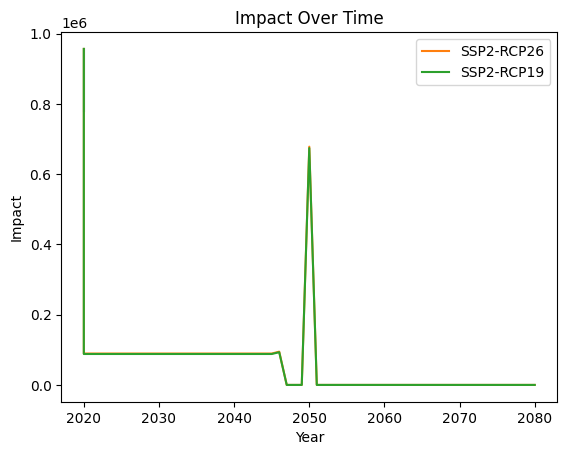

In [34]:
import matplotlib.pyplot as plt

def calculate_2020_sum(input_dict, impact_index):
    sum_2020 = 0
    for key, value in input_dict.items():
        if key[0] == 2020:
            sum_2020 += value[impact_index]
    return sum_2020

def extract_and_aggregate(db, input_dict, impact_index):
    data = {}
    for key, value in input_dict.items():
        year, _, db_name = key
        if '_'.join(db_name.split('_')[:-1]) == db:
            data[year] = data.get(year, 0) + value[impact_index]
    return data

def create_line_plot(input_dict, impact_index):
    sum_2020 = calculate_2020_sum(input_dict, impact_index)
    
    databases = set('_'.join(key[2].split('_')[:-1]) for key in input_dict.keys())  
    
    for db in databases:
        data = extract_and_aggregate(db, input_dict, impact_index)
        
        # Sort data by years
        sorted_data = sorted(data.items())
        
        years, impacts = zip(*sorted_data)
        
        # Inserting the summed 2020 data at the beginning
        years = (2020,) + years
        impacts = (sum_2020,) + impacts
        
        # Plotting
        plt.plot(years, impacts, label=db)
    
    plt.xlabel("Year")
    plt.ylabel("Impact")
    plt.legend()
    plt.title("Impact Over Time")
    plt.show()
    
create_line_plot(new, 0)

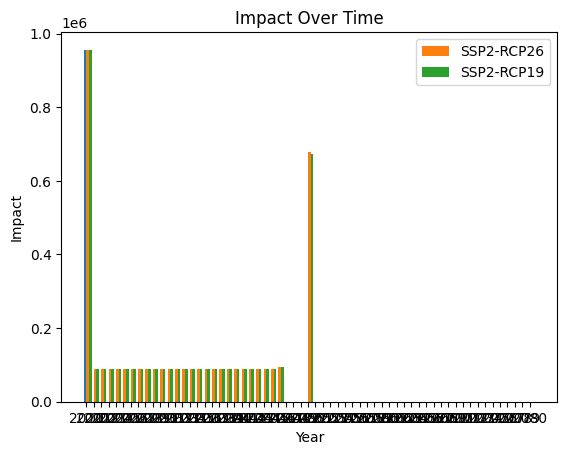

In [35]:
import matplotlib.pyplot as plt

def calculate_2020_sum(input_dict, impact_index):
    sum_2020 = 0
    for key, value in input_dict.items():
        if key[0] == 2020:
            sum_2020 += value[impact_index]
    return sum_2020

def extract_and_aggregate(db, input_dict, impact_index):
    data = {}
    for key, value in input_dict.items():
        year, _, db_name = key
        if '_'.join(db_name.split('_')[:-1]) == db:
            data[year] = data.get(year, 0) + value[impact_index]
    return data

def create_bar_plot(input_dict, impact_index):
    sum_2020 = calculate_2020_sum(input_dict, impact_index)
    
    databases = set('_'.join(key[2].split('_')[:-1]) for key in input_dict.keys())
    
    all_years = sorted(set(key[0] for key in input_dict.keys()))
    bar_width = 0.35  # Adjust as needed
    
    fig, ax = plt.subplots()
    
    for db_idx, db in enumerate(databases):
        data = extract_and_aggregate(db, input_dict, impact_index)
        
        # Sort data by years
        sorted_data = {year: data.get(year, 0) for year in all_years}
        
        years, impacts = zip(*sorted_data.items())
        
        # Adding the summed 2020 data at the beginning
        years = (2020,) + years
        impacts = (sum_2020,) + impacts
        
        # Creating bar for each database
        ax.bar(
            [year + (db_idx * bar_width) for year in years],
            impacts,
            width=bar_width,
            label=db
        )
    
    ax.set_xlabel("Year")
    ax.set_ylabel("Impact")
    ax.set_title("Impact Over Time")
    ax.legend()
    
    # Adjust x-ticks to be in the center of the grouped bars
    ax.set_xticks([year + (bar_width / 2) for year in all_years])
    ax.set_xticklabels(all_years)
    
    plt.show()

# Replace 'new' with your input data dictionary
create_bar_plot(new, 0)


In [ ]:
everything.bd.Method

In [ ]:
everything.GiveMeName.poop_to_excel(data, 'test.xlsx')

{'concrete_foundation_production': {(2050, '3d3a786bfd99f7e4e312c33c1def0b86', 'SSP2-RCP19_2050'): [-0.18662983177191184, -0.0011398314906943619], (2050, '3d3a786bfd99f7e4e312c33c1def0b86', 'SSP2-RCP26_2050'): [-0.18781225780212138, -0.0011384109012428127], (2050, '2eafb2856827730d501b1941671e3160', 'SSP2-RCP19_2050'): [12377.438986924704, 36.810137543811805], (2050, '2eafb2856827730d501b1941671e3160', 'SSP2-RCP26_2050'): [12402.154685428746, 36.8389514576937]}, 'polystyrene foam slab production, 45% recycled': {(2050, '3f058e3bf6791c71e3b121c63c75eba4', 'SSP2-RCP19_2050'): [-364.3300248587018, -0.43636715518737706], (2050, '3f058e3bf6791c71e3b121c63c75eba4', 'SSP2-RCP26_2050'): [-364.35692435565386, -0.4363232939180831], (2050, '2d1a6f71ee1b61ae0650e97319e5fad2', 'SSP2-RCP19_2050'): [3268.8435189827937, 12.041544468207517], (2050, '2d1a6f71ee1b61ae0650e97319e5fad2', 'SSP2-RCP26_2050'): [3305.2727003051937, 11.991370094950478]}, 'polyethylene production, low density, granulate': {(2050